In [1]:
import Bio as bio
from Bio import SeqIO
from Bio.Blast.Applications import NcbiblastpCommandline as BlastP
from Bio.Blast import NCBIWWW 
from Bio.Blast import NCBIXML
from Bio import SearchIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [108]:
bot_amidine_fasta = SeqIO.read("Sequences/Amidine/Bottromycin/Fasta.fa","fasta")

In [111]:
result_handle = NCBIWWW.qblast("blastp", "nr", bot_amidine_fasta.seq, hitlist_size = 1000) 

In [113]:
with open("blast_result.xml", "w+") as file:
    file.write(result_handle.read())
    result_handle.close()

In [114]:
result_handle = open("blast_result.xml", "r")
blast_records = NCBIXML.read(result_handle)

E_threshold = 0.001
ct = 0
for alignment in blast_records.alignments:
    for hsp in alignment.hsps:
        ++ct
        #if hsp.expect < E_threshold:
            #print("\n")
            #print("sequence: {}".format(alignment.title[:100]))


In [123]:
print("Sequence and sequence ID used in the blast search:",bot_amidine_fasta.id, bot_amidine_fasta.seq)
raw_online_fasta = SeqIO.parse("Sequences/Amidine/Bottromycin/seqdump.fa", "fasta")
online_sequence_records = [seq for seq in raw_online_fasta] #Sequences that were derived from the online blast search tool
print("\nNumber of sequences from online Blast Search:", len(online_sequence_records))

online_blast_ids = [online_sequence_record.id for online_sequence_record in online_sequence_records]

blast_presult = SearchIO.read("blast_result.xml", 'blast-xml')
python_seq_records = []
for alignment in blast_presult:
    for hsp in alignment:
        seq = Seq(hsp.hit.seq.ungap())
        seq_record = SeqRecord(seq, id=hsp.hit.id.split("|")[1])
        python_seq_records.append(seq_record)
i=0      
for python_seq_record in python_seq_records[899:]:
    print("seq ID:", python_seq_record.id, python_seq_record.id in online_blast_ids)    
    if(python_seq_record.id in online_blast_ids):
        #print(online_blast_ids.index(python_seq_record.id))
        i+=1
print(i)
    #    index = online_blast_ids.index(python_seq_record.id)
    #    alignments = pairwise2.align.globalxx(python_seq_record.seq, online_sequence_records[index].seq[0:200])
     #   print("\n Alignment for {}:".format(python_seq_record.id))
      #  print(format_alignment(*alignments[0]))

Sequence and sequence ID used in the blast search: AFV25483.1 MRLTDAEGALCSRSSGKGLGHRSMASALFESAEHYHLDWRRDPRASEAEFLPGREIAGQDTARRSALLRRLGGIMPDAPVLTRTYRPVEETLTGRADHGPAGRPHRHPVFLRDGGYRNWPHPDDDRSFQPLWHYTSSAGYAAGATVHEALVHAVNELIERDAWSYQLARSYFGLPGEGPELRVVDHDTLPAELRELTGTVEEVREAPVLIVDITCDTGVPAYVVCDARSREEVRLIGSGASPVRTYALQRALLEYLQVRTMFEHGPVDADTEAGQIATALARYPRHLAAARFDVGQLPHERRAFDADDGLPAAASPEQLLRHLVDRLRDLGVDVHHRVLTPPGSVTVVDVVAPGLEMFDKARAGYPVLPTGRLGERLRPRKDHERGHGVDHGKDRGGAPR

Number of sequences from online Blast Search: 1000
seq ID: RDJ12630.1 True
seq ID: WP_083186407.1 False
seq ID: WP_157063298.1 False
seq ID: WP_260006532.1 False
seq ID: RZN33543.1 False
seq ID: MBT8998357.1 True
seq ID: WP_209673731.1 True
seq ID: MBT8800828.1 True
seq ID: WP_259696898.1 True
seq ID: WP_187519240.1 False
seq ID: MCK9318291.1 False
seq ID: MBT8921924.1 True
seq ID: AKU15595.1 False
seq ID: MBI4612747.1 False
seq ID: OPX76333.1 True
seq ID: MCC2662662.1 True
seq ID: WP_080266151.1 False
seq ID: WP_048185145.1 False

In [57]:
from Bio import Entrez
Entrez.api_key = "a8f78b4657d608ac2e519266eede38d56408"
Entrez.email = "ericgemmell@gmail.com"

# Trying to convert a Fasta with DNA to aa


In [21]:
DNA_Fasta_Seq = SeqIO.parse("DNA_Fasta.fa","fasta")
DNA_Seqs = [seq for seq in DNA_Fasta_Seq]
tenth_seq = DNA_Seqs[10].translate()

bot_amidine_fasta = SeqIO.read("Sequences/Amidine/Bottromycin/Fasta.fa","fasta")
alignments = pairwise2.align.globalxx(bot_amidine_fasta.seq, tenth_seq.seq)
print(DNA_Seqs[10].id)
print(format_alignment(*alignments[0]))

CP090082.1:339535-340662
MRL-TDAEGALCSR-------SSG--KGLGHRSMA--S---ALFESA-EHYHLDWRR----DPRA--------S----EA-E-FLPG-RE-IAG-QDTARRSALLR---RLGGIMP-DAPVLT--RT-YRPVEET-LTGRADHGPAGRPHR-----HPVFLRDGG-YR-----NWP-------HPDDDRSFQP----LWH--YTSSA--GYA-A-GA-TVH--EALV-HAV-NEL-IERDAWSYQLARSYFGLPGEGPELRVVD-H------------DTL---PAELR-ELTG-TVEEVRE----APVL--IVD---I-----TCDTGV----P---AYVVCDARSREEVRLIGS-GAS--P-VR---T--YALQ-----RALL--EYLQVR-T--M---FEHGPVDADTEAGQIAT-----A-L-AR---YPR-HLAAA-R---FDVG--Q-LPH---ER-RA---FDADDGLPAAAS----PE-QL-LRH------LVD--RLR-DL-GV-DVHHRV-----LTPPG-SV----TVVDV--VAPG--LE---MFDKA-RA------GYP-VLPTGRLGERLRPRK-DHERGHGVD-HGKD--RG------GAPR---
    |     |  |       |||  ||||       |   |||| | |||          |  |        |    |  | |    || |   |       ||    |       |  ||   |  |     | |                   | |       |      | |       || || ||      |    | ||   |   | |  |    |||  ||  ||  |||||||  |    | |      |     |            | |   |     ||   |          | |   |     |     |  |      |   |  |    |     | 

# Get SeqDump files and check for unique sequences

In [4]:
import glob
import tqdm
seqdump_dirs = glob.glob("**/**HMMER_seqdump.fa",recursive = True)

print(seqdump_dirs)
unique_sequences = []
i = 0
for seqdump_dir in tqdm.tqdm(seqdump_dirs):
    seqrec_iter = SeqIO.parse(seqdump_dir,"fasta")
    for seqrec in seqrec_iter:
        i += 1
        if seqrec.id not in unique_sequences:
            unique_sequences.append(seqrec.id)
print(i)

['raw_sequences/Amidine/Lasso_peptides/HMMER_seqdump.fa', 'raw_sequences/Amidine/Jesko_but_unknown/HMMER_seqdump.fa', 'raw_sequences/Amidine/Bottromycin/HMMER_seqdump.fa', 'raw_sequences/Azoline/Cyanobactins/PatD_HMMER_seqdump.fa', 'raw_sequences/Azoline/Cyanobactins/TruD_HMMER_seqdump.fa', 'raw_sequences/Azoline/PZN/HMMER_seqdump.fa', 'raw_sequences/Azoline/Muscoride/HMMER_seqdump.fa', 'raw_sequences/Azoline/Sag/HMMER_seqdump.fa', 'raw_sequences/Azoline/Thiostrepton/HMMER_seqdump.fa', 'raw_sequences/Azoline/Mccb17/HMMER_seqdump.fa', 'raw_sequences/Azoline/Bottromycin/HMMER_seqdump.fa', 'raw_sequences/Azoline/Thiopeptide_Lactazole/HMMER_seqdump.fa', 'raw_sequences/Azoline/Heterocycloanthracins/HMMER_seqdump.fa', 'raw_sequences/Azoline/Goadsporin/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Thioholgamide/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Jesko/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Thioviridamide/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Jesko2/HMMER_seqdump.fa', 'raw_se

100%|██████████| 19/19 [00:01<00:00, 12.34it/s]

22903


In [11]:
print(len(unique_sequences))

19405


## Number of sequences per file

In [9]:
import glob
seqdump_dirs = glob.glob("**/**seqdump.txt",recursive = True)

for seqdump_dir in seqdump_dirs:
    i = 0
    seqrec_iter = SeqIO.parse(seqdump_dir,"fasta")
    for seqrec in seqrec_iter:
        i += 1
    if(i<200):
        print("\n{} has {} sequences".format(seqdump_dir,i))
    


Sequences/Amidine/Jesko_but_unknown/seqdump.txt has 18 sequences

Sequences/Azoline/PZN/seqdump.txt has 120 sequences

Sequences/Azoline/Mccb17/seqdump.txt has 64 sequences

Sequences/Azoline/Bottromycin/seqdump.txt has 27 sequences


# Pairwise percent identity 
## Works for pairwise aligned sequences

In [29]:
#Quick bit of code that determines the identity score by a really crude method, which I am not even sure is correct
#because it is consistently higher than Blast result percentage identity, but hey it's close enough
blastp_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/seqdump.txt","fasta")]

tblastn_DNA_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/wgs_DNA_streptomycetateae_seqdump.txt","fasta")]
tblastn_sequences = [seq.translate() for seq in tblastn_DNA_sequences]

seq1 = blastp_sequences[0]
seq2 = tblastn_sequences[0]

alignments = pairwise2.align.globalxx(seq1.seq, seq2.seq)

print(format_alignment(*alignments[0]))
print(alignments[0].score/max(len(seq1),len(seq2)))

ML-EATATECELREVVHRSYPSD-RTVTVRCTVRPAEGT-AQADGYGTATTEAVARAKALSEAVERLVACTPFATVARPPTTPA---PGS-GSGPVPPFPAAGVRTAPD-GCAS-RE-YRPLS-GDG-PRRVPLYWSSPWV-AGE-ELRAGTLS-AAEARLSSTVGWAVAPTPEA-ALRGALLELTELIDYGVFLHRRLAGPARPR-SAGDE-TLVVPLGGAV--RTPT-VLAVAYGRGRLMPATGLGCGAS-RA-EATDRALLELAQAETMWRSNPTAEPAERFFLRRFERWPLLT-RCATLDFELSDLSGLDGLSGLDGLSRL-DGLS-RLDHPSDLNDPAGR--PA--P--YDDGPH-PASPLEELEAGGIT-VWADSGAVDISGPDIPRTRLCFAHVVSDPQPLLGLVRAGIPVFDTGEVRRTLDPSRRDAHRDTPRGAPRDAARDRSADRGPAGRGRQGRRSA
|  |||||||||||||||||||  ||||||||||||||  |||||||||||||||||||||||||||||||||||||||| | |   ||  |||||||||||||||||  |||  |  ||||  | | ||||||||||||  ||  |||||||  |||||||||||||||||||  |||||||||||||||||||||||||||| | ||||  ||||||||    |||  |||||||||||||||||||||  |  ||||||||||||||||||||||||||||||||||||||||  |||||||              |    | |    | | |     || |  ||  |  |||||  |||||||||||||  |||||||||||||||||||||||||||||||||||||||||||||||||||||||                   |   | |          |
M-REATATECELREVVHRSYPS-ERTVTVRCTVRPAEG-SAQADGYGTATTEAVARAKALSE

# "Percentage" identity matrix
### CODE IS VERY SLOW, Better version below

In [55]:
#THIS CODE IS VERY SLOW
import numpy as np
from tqdm import tqdm

def perc_identity(alignment,seq1,seq2):
    return alignment[0].score/max(len(seq1),len(seq2))

def perc_identity_matrix(sequences):
    with tqdm(total=pow(len(sequences),2)) as pbar:
        matrix = np.zeros((len(sequences),len(sequences)))
        for i in range(len(sequences)):
            matrix[i,i] = 1
            pbar.update(1)
            for j in range(i):
                alignment = pairwise2.align.globalxx(sequences[i].seq, sequences[j].seq)
                matrix[i,j] = perc_identity(alignment,sequences[i].seq,sequences[j].seq)
                matrix[j,i] = matrix[i,j]
                pbar.update(2)
        
    return matrix


tblastn_DNA_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/wgs_DNA_streptomycetateae_seqdump.txt","fasta")]
tblastn_sequences = [seq.translate() for seq in tblastn_DNA_sequences]
print(len(tblastn_sequences))
identity_matrix = perc_identity_matrix(tblastn_sequences)
print(identity_matrix)


42


100%|██████████| 1764/1764 [00:46<00:00, 37.86it/s]

[[1.       1.       1.       ... 0.167979 0.167979 0.167979]
 [1.       1.       1.       ... 0.167979 0.167979 0.167979]
 [1.       1.       1.       ... 0.167979 0.167979 0.167979]
 ...
 [0.167979 0.167979 0.167979 ... 1.       1.       1.      ]
 [0.167979 0.167979 0.167979 ... 1.       1.       1.      ]
 [0.167979 0.167979 0.167979 ... 1.       1.       1.      ]]


1.0


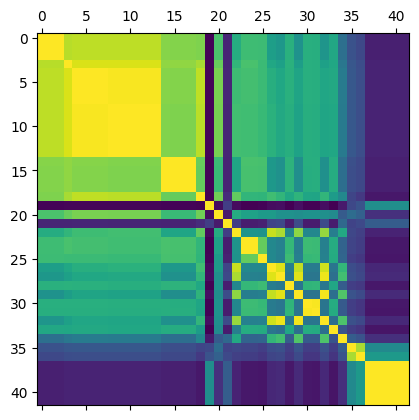

In [51]:
import matplotlib.pyplot as plt

print(identity_matrix[0,0])
plt.matshow(identity_matrix)

23


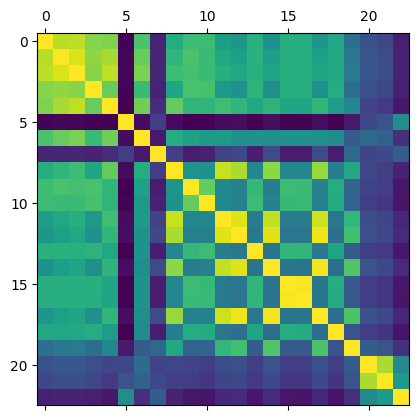

In [83]:
def perc_identity_cutoff(sequences,matrix,cutoff=1):
    dissimilar_sequences = []
    indexes_to_del = []
    dissimilar_sequences.append(sequences[0])
    for i in range(1,matrix.shape[0]):
        if(matrix[:i,i].max() < cutoff):
            dissimilar_sequences.append(sequences[i])
        else:
            indexes_to_del.append(i)
    matrix = np.delete(matrix, indexes_to_del, axis = 0)
    matrix = np.delete(matrix, indexes_to_del, axis = 1)
    return dissimilar_sequences, matrix

unique_sequences, unique_matrix = perc_identity_cutoff(tblastn_sequences, identity_matrix, cutoff=0.99)
plt.matshow(unique_matrix)
print(len(unique_sequences))

In [73]:
def perc_identity(seq1,seq2): #percentage identity between two aligned sequences
    
    return alignment[0].score/max(len(seq1),len(seq2))

0.9893048128342246


In [10]:
!pip install pylev levenshtein

  Using cached Levenshtein-0.20.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (175 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 314.8 kB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [36]:
import pylev
import Levenshtein
import tqdm
import matplotlib.pyplot as plt
import numpy as np

def get_sequences(file_name): #Returns a list of seqRecords from filename instead of iterable like SeqIO would
    return [seq for seq in SeqIO.parse(file_name,"fasta")]

In [7]:
a = 'carlos'
b = 'b arlos'

pylev.levenshtein(a, b)

2

In [28]:
#unique_sequences = get_sequences("raw_sequences/Azoline/Bottromycin/seqdump.txt")
tblastn_DNA_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/wgs_DNA_streptomycetateae_seqdump.txt","fasta")]
unique_sequences = [seq.translate() for seq in tblastn_DNA_sequences]

seq1 = str(unique_sequences[0].seq)
seq2 = str(unique_sequences[1].seq)

In [29]:
pylev.levenshtein(seq1, seq2)

0

In [31]:
similarity_matrix = []

for i in tqdm.tqdm(range(len(unique_sequences))):
    row = []
    for j in range(len(unique_sequences)):
        seq1 = str(unique_sequences[i].seq)
        seq2 = str(unique_sequences[j].seq)
        similarity = pylev.levenschtein(seq1, seq2)
        row.append(similarity)
    similarity_matrix.append(row)

        

100%|██████████| 42/42 [01:22<00:00,  1.96s/it]


In [38]:
m = np.array(similarity_matrix)

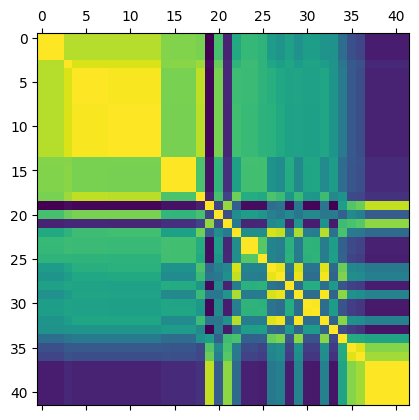

In [39]:
plt.matshow(-m)